<a href="https://colab.research.google.com/github/GabrielLQ/Algoritmo-de-compracion-de-tiempo/blob/main/comparar_algoritmos_de_ordenamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


	1 - ingresar datos
	2 - Valores predeterminados
	0 - salir
Insertar opcion: 100
Opcion no existente

	1 - ingresar datos
	2 - Valores predeterminados
	0 - salir
Insertar opcion: 1
Ingresar la cantidad de valores maxima100
Ingresar la cantidad de saltos10

	1 - ingresar datos
	2 - Valores predeterminados
	0 - salir
Insertar opcion: 0
   Tiempo  HeapSort  BubbleSort  QuickSort  RadixSort  CountingSort
0      10    0.1728      0.1699     0.2076     2.6466        0.2126
1      20    0.2047      0.1937     0.2409     4.1219        0.2016
2      30    0.2491      0.2443     0.2512     5.7625        0.2400
3      40    0.3170      0.3554     0.2784     7.1587        0.2083
4      50    0.3447      0.4016     0.3232     8.6993        0.2629
5      60    0.3664      0.4932     0.3397    10.2035        0.2517
6      70    0.4145      0.6093     0.3840    12.7863        0.2555
7      80    0.4853      0.8205     0.4627    13.3182        0.2591
8      90    0.5528      0.9402     0.5433    14.69

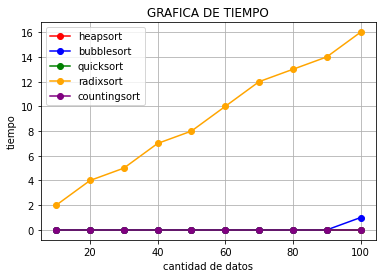

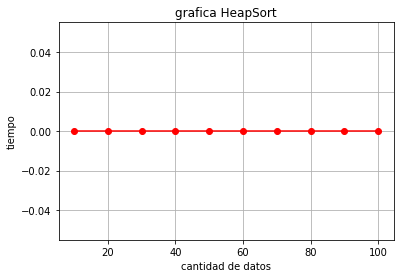

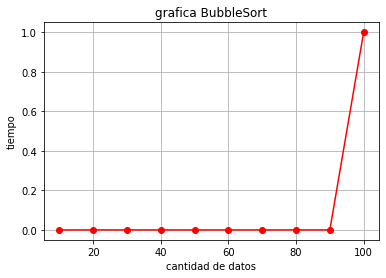

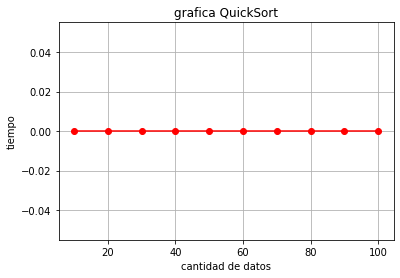

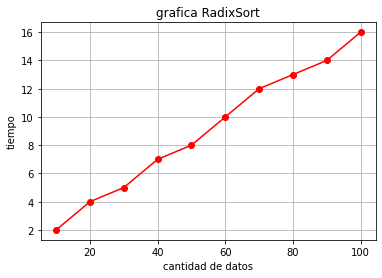

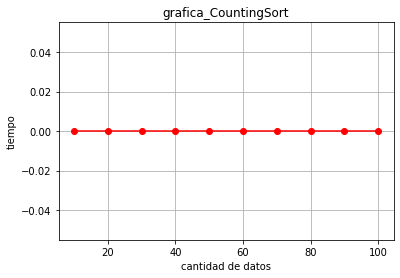

In [8]:
#Librerias
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import datetime 
import random
import os , sys
from tabulate import tabulate
from matplotlib import pyplot as plt
sys.setrecursionlimit(1000000)

#ALGORITMOS DE ORDENAMIENTO


#HEAP_SORT
def heapify(arr, n, i):
    largest = i  #raiz
    l = 2 * i + 1     
    r = 2 * i + 2     
    if l < n and arr[largest] < arr[l]:
        largest = l
    if r < n and arr[largest] < arr[r]:
        largest = r
 
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heapSort(arr):
    n = len(arr)
    for i in range(n//2 - 1, -1, -1):
        heapify(arr, n, i)
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  
        heapify(arr, i, 0)


# BubbleSort
def bubbleSort(arr):
    n = len(arr)
  
    for i in range(n):
  
        for j in range(0, n-i-1):
  
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]


#Quick Sort
def partition(start, end, array):
     
    pivot_index = start
    pivot = array[pivot_index]
     
    while start < end:
         
        while start < len(array) and array[start] <= pivot:
            start += 1
             
        while array[end] > pivot:
            end -= 1
         
        if(start < end):
            array[start], array[end] = array[end], array[start]
     
    array[end], array[pivot_index] = array[pivot_index], array[end]
    
    return end
     

def quick_sort(start, end, array):
     
    if (start < end):
       
        p = partition(start, end, array)
         
        quick_sort(start, p - 1, array)
        quick_sort(p + 1, end, array)


#Radix Sort
def countingSortForRadix(inputArray, placeValue):
    # We can assume that the number of digits used to represent
    # all numbers on the placeValue position is not grater than 10
    countArray = [0] * 10
    inputSize = len(inputArray)

    # placeElement is the value of the current place value
    # of the current element, e.g. if the current element is
    # 123, and the place value is 10, the placeElement is
    # equal to 2
    for i in range(inputSize): 
        placeElement = (inputArray[i] // placeValue) % 10
        countArray[placeElement] += 1

    for i in range(1, 10):
        countArray[i] += countArray[i-1]

    # Reconstructing the output array
    outputArray = [0] * inputSize
    i = inputSize - 1
    while i >= 0:
        currentEl = inputArray[i]
        placeElement = (inputArray[i] // placeValue) % 10
        countArray[placeElement] -= 1
        newPosition = countArray[placeElement]
        outputArray[newPosition] = currentEl
        i -= 1
        
    return outputArray

def radixSort(inputArray):
    # Step 1 -> Find the maximum element in the input array
    maxEl = max(inputArray)

    # Step 2 -> Find the number of digits in the `max` element
    D = 1
    while maxEl > 0:
        maxEl /= 10
        D += 1
    
    # Step 3 -> Initialize the place value to the least significant place
    placeVal = 1

    # Step 4
    outputArray = inputArray
    while D > 0:
        outputArray = countingSortForRadix(outputArray, placeVal)
        placeVal *= 10  
        D -= 1

    return outputArray


#Counting Sort
def count_sort(arr):
    max_element = int(max(arr))
    min_element = int(min(arr))
    range_of_elements = max_element - min_element + 1
    # Create a count array to store count of individual
    # elements and initialize count array as 0
    count_arr = [0 for _ in range(range_of_elements)]
    output_arr = [0 for _ in range(len(arr))]
  
    # Store count of each character
    for i in range(0, len(arr)):
        count_arr[arr[i]-min_element] += 1
  
    # Change count_arr[i] so that count_arr[i] now contains actual
    # position of this element in output array
    for i in range(1, len(count_arr)):
        count_arr[i] += count_arr[i-1]
  
    # Build the output character array
    for i in range(len(arr)-1, -1, -1):
        output_arr[count_arr[arr[i] - min_element] - 1] = arr[i]
        count_arr[arr[i] - min_element] -= 1
  
    # Copy the output array to arr, so that arr now
    # contains sorted characters
    for i in range(0, len(arr)):
        arr[i] = output_arr[i]
  
    return arr

#FUncion para calcular el tiempo de diferentes algoritmos

# calculo de tiempo de algoritmos
def Calcular_Tiempo(numero_valores , bubblesort_tiempo , heapsort_tiempo , quicksort_tiempo , radixsort_tiempo , countingsort_tiempo):

    
    #Heapsort
    heapsort_tiempo = []
    #bubblesort
    bubblesort_tiempo = []

    #quicksort
    quicksort_tiempo = []
    #radixsort
    radixsort_tiempo = []
    #countingsort
    countingsort_tiempo = []
    for i in range(len(numero_valores)):
        #arreglos para el ordenamiento
        arreglos = [random.randint(0, 100) for x in range(numero_valores[i])]
        arreglos1 = arreglos

        #bubblesort 
        inicio = time.time()
        time.sleep(0.1)
        bubbleSort(arreglos1)
        fin = time.time()
        tiempo = ((fin - inicio) - 0.1)*1000
        bubblesort_tiempo.append(tiempo)

        arreglos1 = arreglos

        #heapsort
        inicio = time.time()
        time.sleep(0.1)
        heapSort(arreglos1)
        fin = time.time()
        tiempo = ((fin - inicio) - 0.1)*1000
        heapsort_tiempo.append(tiempo)

        arreglos1 = arreglos 

        #quicksort
        inicio = time.time()
        time.sleep(0.1)
        quick_sort(0 , len(arreglos1)-1 , arreglos1)
        fin = time.time()
        tiempo = ((fin - inicio) - 0.1)*1000
        quicksort_tiempo.append(tiempo)

        arreglos1 = arreglos

        #radixsort
        inicio = time.time()
        time.sleep(0.1)
        arreglos2 = radixSort(arreglos1)
        fin = time.time()
        tiempo = ((fin - inicio) - 0.1)*1000
        radixsort_tiempo.append(tiempo)

        arreglos1 = arreglos

        #countingSort
        inicio = time.time()
        time.sleep(0.1)
        arreglos3 = count_sort(arreglos1)
        fin = time.time()
        tiempo = ((fin - inicio) - 0.1)*1000
        countingsort_tiempo.append(tiempo)

        #vacia arreglos
        arreglos.clear

    return bubblesort_tiempo , heapsort_tiempo , quicksort_tiempo , radixsort_tiempo, countingsort_tiempo

#Grafica conjunta
def grafica_total(numero_valores , bubblesort_tiempo , heapsort_tiempo , quicksort_tiempo , radixsort_tiempo , countingsort_tiempo):
    heapsort_tiempo1 = [int(x) for x in heapsort_tiempo]
    bubblesort_tiempo1 = [int(x) for x in bubblesort_tiempo]
    quicksort_tiempo1 = [int(x) for x in quicksort_tiempo]
    radixsort_tiempo1 = [int(x) for x in radixsort_tiempo]
    countingsort_tiempo1 = [int(x) for x in countingsort_tiempo]

    plt.plot(numero_valores , heapsort_tiempo1  , marker = "o" ,  color = "red" , label = "heapsort")
    plt.plot( numero_valores , bubblesort_tiempo1  , marker = "o" , color = "blue", label = "bubblesort" )
    plt.plot(numero_valores ,  quicksort_tiempo1  , marker = "o" , color = "green" , label = "quicksort")
    plt.plot( numero_valores , radixsort_tiempo1   , marker = "o" , color = "orange" , label = "radixsort")
    plt.plot( numero_valores , countingsort_tiempo1  , marker = "o" , color = "purple" , label = "countingsort")
    plt.ylabel("tiempo")
    plt.xlabel("cantidad de datos")
    plt.title("GRAFICA DE TIEMPO")
    plt.legend()
    plt.grid()
    plt.show()  

#Grafica unitaria
def grafica_unitaria(numero_valores , algoritmo_tiempo , nombre_algoritmo):
    algoritmo_tiempo1 = [int(x) for x in algoritmo_tiempo]
    plt.plot(numero_valores , algoritmo_tiempo1  , marker = "o" ,  color = "red")
    plt.title(nombre_algoritmo)
    plt.ylabel("tiempo")
    plt.xlabel("cantidad de datos")
    plt.grid()
    plt.show()   

#tabla
def Tabla(numero_valores , bubblesort_tiempo , heapsort_tiempo , quicksort_tiempo , radixsort_tiempo , countingsort_tiempo):
    valores = numero_valores
    heapsort_tiempo1 = [round(x,4) for x in heapsort_tiempo]
    bubblesort_tiempo1 = [round(x,4) for x in bubblesort_tiempo]
    quicksort_tiempo1 = [round(x,4) for x in quicksort_tiempo]
    radixsort_tiempo1 = [round(x,4) for x in radixsort_tiempo]
    countingsort_tiempo1 = [round(x,4) for x in countingsort_tiempo]
    df = pd.DataFrame({"Tiempo(ms)":valores,
                    "HeapSort":heapsort_tiempo1,
                    "BubbleSort":bubblesort_tiempo1,
                    "QuickSort": quicksort_tiempo1,
                    "RadixSort":radixsort_tiempo1,
                    "CountingSort":countingsort_tiempo1})
    print (df)   

#arreglo donde almacena la cantidad de datos para ordenar
numero_valores = []
cantidad_datos = 0
saltos = 0
#menu de opciones
def menu():
    os.system("cls")
    print ("")
    print ("\t1 - ingresar datos")
    print ("\t2 - Valores predeterminados")
    print ("\t0 - salir")
    
while True:
    menu()
    
    opc = input("Insertar opcion: ")
    
    if opc == "1":
        while True:
            numero_valores.clear()
        #tamaño de arreglo a comparar
            cantidad_datos =int( input("Ingresar la cantidad de valores maxima"))
            saltos = input("Ingresar la cantidad de saltos")
            if int(saltos) % 5 == 0 and int(saltos) >=10 and int(cantidad_datos) >20 :
                break
        cantidad_datos = int(cantidad_datos) 
        saltos = int(saltos)
        for i in range(10 , cantidad_datos+saltos , saltos):
            numero_valores.append(i)

        
    elif opc == "2":
        print("Valores predeterminados")
        numero_valores.clear()
        numero_valores = [10,50,100,500,1000,5000,10000,50000,100000]
        
    elif opc == "0":
        break
    else :
        print("Opcion no existente")

bubblesort_tiempo = []
radixsort_tiempo = []
countingsort_tiempo =[]
quicksort_tiempo = []
heapsort_tiempo = []
heapSort(numero_valores)
bubblesort_tiempo , heapsort_tiempo , quicksort_tiempo , radixsort_tiempo , countingsort_tiempo  = Calcular_Tiempo(numero_valores , bubblesort_tiempo , heapsort_tiempo , quicksort_tiempo , radixsort_tiempo , countingsort_tiempo)

#TABLA
Tabla(numero_valores , bubblesort_tiempo , heapsort_tiempo , quicksort_tiempo , radixsort_tiempo , countingsort_tiempo)        
#Grafica
grafica_total(numero_valores , bubblesort_tiempo , heapsort_tiempo , quicksort_tiempo , radixsort_tiempo , countingsort_tiempo)
#Grafica_unitaria
print()
grafica_unitaria(numero_valores , heapsort_tiempo , "grafica HeapSort")
print()
grafica_unitaria(numero_valores , bubblesort_tiempo ,"grafica BubbleSort")
print()
grafica_unitaria(numero_valores , quicksort_tiempo ,"grafica QuickSort")
print()
grafica_unitaria(numero_valores , radixsort_tiempo ,"grafica RadixSort")
print()
grafica_unitaria(numero_valores , countingsort_tiempo , "grafica_CountingSort")